# My Solution to Exercise 1

In [43]:
import numpy as np 

def p(x, coeff):
    x_seq = np.empty_like(np.array(coeff))
    x_seq[:] = x
    x_seq[0] = 1
    x_prod = x_seq.cumprod()
    return np.sum(x_prod*coeff)

In [48]:
coef = np.ones(3)
print(coef)
print(p(1, coef))

[ 1.  1.  1.]
3.0


# Text Solution to Exercise 1

In [45]:
def p(x, coef):
    X = np.empty(len(coef))
    X[0] = 1
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y

In [46]:
coef = np.ones(3)
print(coef)
print(p(1, coef))
# For comparison
q = np.poly1d(coef)
print(q(1))

[ 1.  1.  1.]
3.0
3.0


# My Solution to Exercise 2

Sample code

In [49]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]

In [57]:
q = [0.25, 0.75]
q[sample(q)]

0.25

In [106]:
from random import uniform
import numpy as np

class discreteRV:
    def __init__(self,q):
        self.data = q
    def draw(self,k):
        draws = []
        for i in range(k):
            U = uniform(0,1)
            cum = np.cumsum(self.data)        
            draws.append(np.searchsorted(cum, U))
        return draws

In [108]:
test = discreteRV([0.25,0.75])

In [109]:
test.data

[0.25, 0.75]

In [110]:
test.draw(2)

[1, 1]

# Text Solution to Exercise 2

In [111]:
from numpy import cumsum
from numpy.random import uniform

class discreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

In [112]:
import numpy as np
from numpy import cumsum
from numpy.random import uniform


class DiscreteRV(object):
    """
    Generates an array of draws from a discrete random variable with
    vector of probabilities given by q.
    Parameters
    ----------
    q : array_like(float)
        Nonnegative numbers that sum to 1
    Attributes
    ----------
    q : see Parameters
    Q : array_like(float)
        The cumulative sum of q
    """

    def __init__(self, q):
        self._q = np.asarray(q)
        self.Q = cumsum(q)

    def __repr__(self):
        return "DiscreteRV with {n} elements".format(n=self._q.size)

    def __str__(self):
        return self.__repr__()

    @property
    def q(self):
        """
        Getter method for q.
        """
        return self._q

    @q.setter
    def q(self, val):
        """
        Setter method for q.
        """
        self._q = np.asarray(val)
        self.Q = cumsum(val)

    def draw(self, k=1):
        """
        Returns k draws from q.
        For each such draw, the value i is returned with probability
        q[i].
        Parameters
        -----------
        k : scalar(int), optional
            Number of draws to be returned
        Returns
        -------
        array_like(int)
            An array of k independent draws from q
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

# My Solution to Exercise 3

Solution to Exercise 1 in the OOP Lecture:

```python
class ECDF:
    
    def __init__(self, samples):
        "Initializes observations with the user supplied samples"
        self.observations = samples
    
    def __call__(self, x):
        seq = []
        for obs in self.observations:
            if obs <= x:
                seq.append(1)
            else:
                seq.append(0)
        return (1/len(seq)*sum(seq))
```

Tasks:
1. Make the `__call__` method more efficient using `NumPy`
2. Add a method that plots the ` ECDF` over $[a,b]$, where $a$ and $b$ are method parameters

In [127]:
import numpy as np 
import matplotlib.pyplot as plt

class ECDF:
    
    def __init__(self, samples):
        "Initializes observations with the user supplied samples"
        self.observations = np.asarray(samples)
    
    def __call__(self, x):
        return np.mean(self.observations <= x)
    
    def plot(self, a = None, b = None):
        if a == None:
            a = self.observations.min() - self.observations.std()
        if b == None:
            b = self.observations.max() + self.observations.std()
        I = np.vectorize(self.__call__)
        fig, ax = plt.subplots()
        x = np.linspace(a, b, 100)
        y = I(x)
        ax.plot(x, y, 'r-', linewidth=2, alpha=0.6)
        plt.show()

In [128]:
samples = np.random.randn(100000)
F = ECDF(samples)
F(0)

0.49952000000000002

In [129]:
%timeit F(0.5)

1000 loops, best of 3: 178 µs per loop


In [130]:
F.observations.min() - F.observations.std()

-5.0411734856825756

In [131]:
F.observations.max() + F.observations.std()

5.3475842256134847

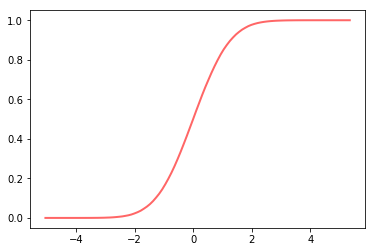

In [132]:
F.plot()

# Text Solution to Exercise 3

In [133]:
class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower end point of the plot interval
        b : scalar(float), optional(default=None)
            Upper end point of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()


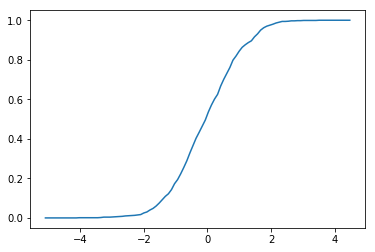

In [134]:
X = np.random.randn(1000)
F = ECDF(X)
F.plot()